In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(f'{os.getcwd()}/data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df.head()

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [4]:
year_means = df.groupby(pd.Grouper(key="Day", freq="1YS")).mean()['t']

print(f"maximum temperature: {year_means.max()}, "
      f"maximum temperature year: {year_means.idxmax().year}")
print(f"minimum temperature: {year_means.min()}, "
      f"minimum temperature year: {year_means.idxmin().year}")

maximum temperature: 9.07945205479452, maximum temperature year: 2015
minimum temperature: 6.980821917808219, minimum temperature year: 2012


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [5]:
jan_pos = (df['Day'].dt.month == 1) & (df.t >= 0)
filtered_df = df.loc[jan_pos, :].apply(lambda row: [row.Day, 1], axis="columns", result_type="broadcast")
months = filtered_df.groupby(pd.Grouper(key="Day", freq="1MS"))['t'].sum()

print(f"maximum number of days: {months.max()}, "
      f"year: {months.idxmax().year}")

maximum number of days: 19, year: 2008


**3.** В каком году было самое холодное лето (по средней температуре)

In [6]:
is_summer = (df['Day'].dt.month == 6) | (df['Day'].dt.month == 7) | (df['Day'].dt.month == 8)
summers_means = df[is_summer].groupby(pd.Grouper(key="Day", freq="3MS")).mean()['t']

print(f"mean temperature of coldest summer: {summers_means.max()}, "
      f"year: {summers_means.idxmax().year}")

mean temperature of coldest summer: 22.119565217391305, year: 2010


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [7]:
differences = df['t'].diff().abs()

print(f"max diff: {differences.max()}, "
      f"day: {df.iloc[differences.idxmax()].Day}")

max diff: 15.0, day: 2014-05-27 00:00:00


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

<AxesSubplot:xlabel='Day'>

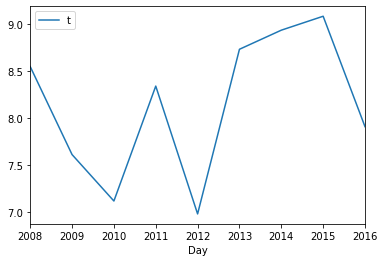

In [8]:
df.groupby(pd.Grouper(key="Day", freq="1YS")).mean().plot()